# Quadratic predictor

Note: if you run this notebook on your own laptop, you may need to install the packages numpy, scikit-learn and matplotlib (perhaps via pip install numpy etc). If you use anaconda the packages should already be there. On google colab you do not need to do anything.

* https://numpy.org/
* https://scikit-learn.org/stable/
* https://matplotlib.org/

In [1]:
import numpy as np
import sklearn 
import math
import matplotlib.pyplot as plt
plt.style.use("seaborn") # for nicer plots

colormap='autumn'

## Toy dataset

We generate an artificial data set that is not separable by a linear predictor. Don't worry too much what the label function does -- we only want to generate a slightly complex looking dataset.

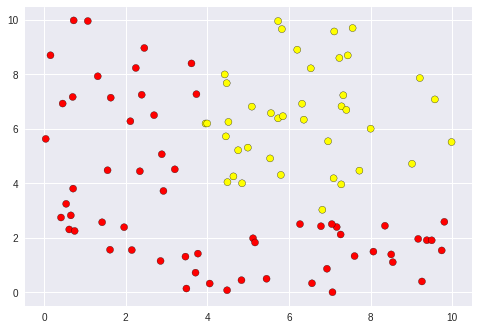

In [2]:
## ignore this bit of code
def label(X,angle=30,shift=[-5,-3],a=0.3):
    X=X+np.array([shift])
    angle=math.radians(angle)
    return a*(X[:,0]*math.cos(angle)-X[:,1]*math.sin(angle))**2<(X[:,0]*math.sin(angle)+X[:,1]*math.cos(angle))
X=np.random.random(size=(100,2))*10
y=label(X)

fig,ax=plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y,cmap=colormap,edgecolor="black")
plt.show()

Next piece of code is for the contour plots that show the classification boundary

In [3]:
## this can be ignored, too
resolution=500
L1=np.linspace(-0.5,10.5,num=resolution)
L2=np.linspace(-0.5,10.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)

## Let's try with a linear predictor

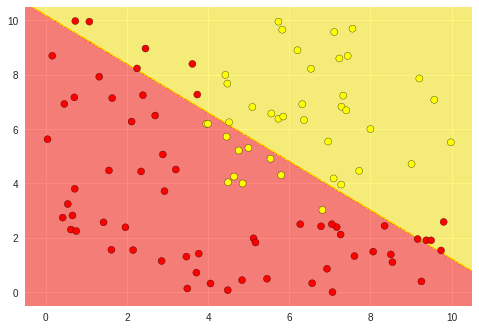

In [4]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='lbfgs')  # again we pick the solver lbfgs 
logreg.fit(X,y) # train the classifier

## plot decision boundary and true class
fig,ax=plt.subplots()
Z=logreg.predict(np.array([XX.flatten(),YY.flatten()]).T)
Z=Z.reshape(XX.shape)
ax.contourf(XX,YY,Z,alpha=0.5,cmap=colormap)
ax.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap=colormap)
plt.show()

The plot shows the original data set as individual dots, with the "true" class, and, as background, the classification boundary of the linear classifier
(here a logistic regression). What we note: the linear classifier misclassifies certain points of the dataset (yellow dots on red background and red dots on yellow background). 

## Next, a quadratic predictor

As outlined in the lecture notes, we can turn a linear predictor into a quadratic one simply by transforming the training set. In scikit-learn this easily done in a preprocessing step. The class PolynomialFeatures turns a dataset into one with polynomial features of the desired degree (in our case 2). It works quite in a similar way as the predictors. That is, it has a fit step and then a transform step instead of a prediction step. Because we often perform these two steps consecutively, there is a method, fit_transform, that does this in one go. 

In [5]:
from sklearn.preprocessing import PolynomialFeatures
quad_feat=PolynomialFeatures(degree=2)
logreg2=LogisticRegression(solver='lbfgs')
logreg2.fit(quad_feat.fit_transform(X),y)

LogisticRegression()

Okay that was a lot of cryptic output. What we see here are simply the parameters with which logistic regression was run. We see, for instance, that the numerical solver was chosen to be lbfgs and that it was allowed to perform up to 100 iterations (<code>max_iter=100</code>).

Let's plot the decision boundary.

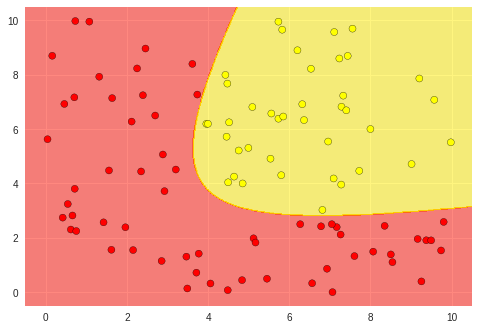

In [6]:
## plot decision boundary and true class
fig,ax=plt.subplots()
Z=logreg2.predict(quad_feat.fit_transform(np.array([XX.flatten(),YY.flatten()]).T))
Z=Z.reshape(XX.shape)
ax.contourf(XX,YY,Z,alpha=0.5,cmap=colormap)
ax.scatter(X[:,0],X[:,1],c=y,edgecolor='black',cmap=colormap)
plt.show()

In contrast to the linear classifier above a quadratic classifier can fit the dataset so that (almost) no datapoint is misclassified. 

## The training error

Let's compare the training error of the linear classifier with the one of the quadratic classifier.

In [7]:
from sklearn.metrics import zero_one_loss

## just to have all code in one place, we do the fit again and then do
## prediction on the training set
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(X,y) 
y_pred=logreg.predict(X)
linear_error=zero_one_loss(y,y_pred)

## we do the same for the quadratic classifier
## again we repeat all the steps to have all code in one place
quad_feat=PolynomialFeatures(degree=2)
logreg2=LogisticRegression(solver='lbfgs')
logreg2.fit(quad_feat.fit_transform(X),y)
y_pred2=logreg2.predict(quad_feat.fit_transform(X))
quad_error=zero_one_loss(y,y_pred2)

print("training error linear predictor / quadratic predictor: {:.3}% / {:.3}%".format(linear_error*100,quad_error*100))

training error linear predictor / quadratic predictor: 21.0% / 0.0%


## Play with the code

Generate a more complicated toy data set, and train a linear and a quadratic predictor on it. Compare the results. 